**补偿 IIR 滤波器引入的延迟**

对信号进行滤波会引入延迟。这意味着相对于输入，输出信号在时间上有所偏移。

无限脉冲响应滤波器对某些频率分量的延迟可能比其他频率分量更长。它们会使输入信号呈现明显失真。函数**filtfilt**可补偿此类滤波器引入的延迟，从而校正滤波器失真。这种“零相位滤波”是对信号进行前向和后向滤波的结果。

以 500 Hz 的频率对心电图读数采样，采样时间为 1 秒。添加随机噪声。

In [1]:
import numpy as np 
from scipy import signal  
from scipy.io import loadmat  
import matplotlib.pyplot as plt    

Fs = 500  
N = 500  
np.random.seed(0)    

x = loadmat('ecg_signal.mat')  
xn = x['x'].flatten()+0.2*np.random.randn(N)  
tn = np.arange(N)/Fs

使用滤波器阻挡 75 Hz 以上的频率，以消除一部分噪声。指定一个 7 阶 IIR 滤波器，通带波纹为 1 dB，阻带衰减为 60 dB。

In [2]:
Nf = 7 
Fp = 75 
Ap = 1 
As = 60  
b,a = (signal.iirfilter(Nf,Fp,rp=Ap,rs=As,btype='lowpass',ftype='ellip',fs=Fs))

对信号进行滤波。滤波后的信号比原始信号干净，但相对于原始信号存在滞后。由于滤波器的非线性相位，它也存在失真。放大峰值附近的区域。

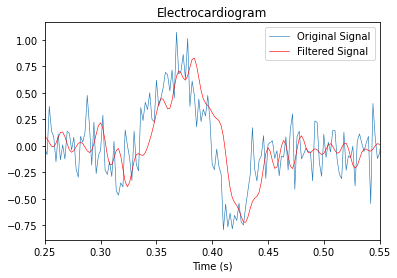

In [3]:
zi = signal.lfilter_zi(b,a)*0 
xfilter,_ = signal.lfilter(b,a,xn,zi=zi)  

fig,ax = plt.subplots()  
ax.plot(tn,xn,label='Original Signal',linewidth=0.6)  
ax.plot(tn,xfilter,color='red',label='Filtered Signal',linewidth=0.6) 
ax.set_title('Electrocardiogram')  
ax.set_xlabel('Time (s)');ax.legend()  
ax.set_xlim([0.25,0.55])
fig.savefig("program1.png",dpi=500)

通过观察滤波器引入的群延迟，可以看出延迟与频率有关。

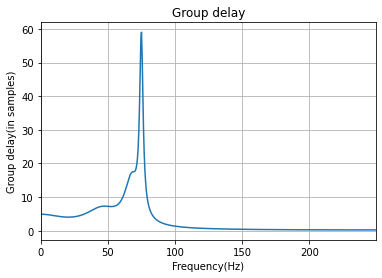

In [4]:
w,gd = signal.group_delay((b,a),w=N,fs=Fs)  

fig,ax = plt.subplots()  
ax.plot(w,gd);ax.grid()  
ax.set_title('Group delay')  
ax.set_ylabel('Group delay(in samples)')  
ax.set_xlabel('Frequency(Hz)')  
ax.autoscale(tight=True,axis='x')
fig.savefig("program2.png",dpi=500)

使用**filtfilt**对信号进行滤波。延迟和失真已被有效消除。当使信号的相位信息保持原样至关重要时，请使用**filtfilt**。

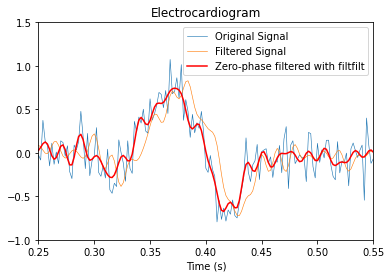

In [5]:
xfiltfilt = signal.filtfilt(b,a,xn)  

fig,ax = plt.subplots()   
ax.plot(tn,xn,tn,xfilter,linewidth=0.6) 
ax.plot(tn,xfiltfilt,color='red') 
ax.set_title('Electrocardiogram')   
ax.set_xlabel('Time (s)')   
ax.legend(['Original Signal','Filtered Signal',
'Zero-phase filtered with ''filtfilt''']) 
ax.set_xlim([0.25,0.55])
ax.set_ylim([-1,1.5])
fig.savefig("program3.png",dpi=500)